In [17]:
# Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Base path
BASE = "/mnt/e/bootcamp/Project/azmmon_farz"

# File paths
CLEAN_FILE = f"{BASE}/cleaned_23_42 (1).csv"
UTM_FILE   = f"{BASE}/utm_coords1.csv"
PRICE_FILE = f"{BASE}/total_price.csv"


In [ ]:
# Select only relevant numeric columns
clean = pd.read_csv(
    CLEAN_FILE,
    usecols=["rooms_count", "land_size", "building_size"],
    encoding="utf-8",
    low_memory=False
)

# Force numeric values (invalid -> NaN)
clean = clean.apply(pd.to_numeric, errors="coerce")


In [ ]:
utm = pd.read_csv(UTM_FILE, encoding="utf-8", low_memory=False)
utm = utm.apply(pd.to_numeric, errors="coerce")

In [ ]:
price = pd.read_csv(PRICE_FILE, encoding="utf-8", low_memory=False)

# Convert to numeric
price = price.apply(pd.to_numeric, errors="coerce")

# Drop unwanted index column
price = price.drop(columns=["Unnamed: 0"])


In [ ]:
# Merge all dataframes column-wise (by index)
merged = pd.concat([clean, utm, price], axis=1)

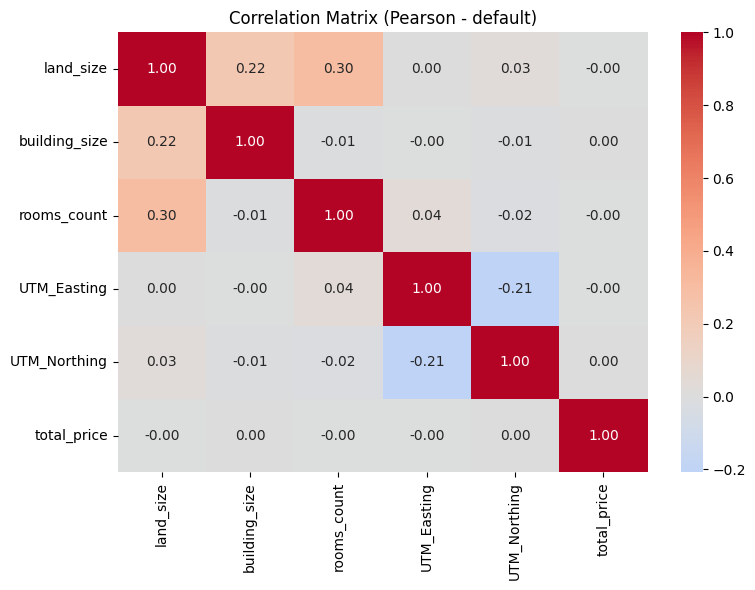

In [22]:
# Compute correlation on numeric columns
corr = merged.corr()

# Heatmap plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix (Pearson - default)")
plt.tight_layout()
plt.show()
